# IMPORT MODULE

In [1]:
# exploring data
import pandas as pd
import numpy as np
import csv

# visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# library machine learning
from sklearn.linear_model  import LinearRegression # for linear regression algorithm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split # to split data 

#statistic module
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Jupyter themes
from jupyterthemes import jtplot
jtplot.style (theme='gruvboxd')

from IPython.display import Image # import picture inside cell




##  INTRODUCTION :
1. Define the problem
2. Linear regression equations


## WORK FLOW :

### 1.Gather data :
1. import the data

### 2.Cleaning data:
1. checking the null

### 3.Visualize and explore the data:
1. visualize the data
2. find the correlation data

### 4.Train algorithm :
1. split data for training and testing
2. Train algorithm

### 5.Evaluate the data:
1. using log regression
2. testing the significance of the correlation
3. using P- values to conclude

### $$INTRODUCTION$$
### 1. Define The Problem
in this project we try to analyze the dataset to find the best fit line to predict the price from the other parameters

### 2.The Linear Regression Equation
#### 2.1 Single Llinear Regression Formula
##### $$ \hat{y} = \theta_{0} + \theta_{1}X $$

#### 2.2 Multivariable Regression Formula
##### $$ \hat{y} = \theta_{0} + \theta_{1}X_{1} + \theta_{2}X_{2} + ... + \theta_{n}X_{n}$$
$ \theta_{0} = intercept $

$ \theta_{1} = Slope $

#### 2.3 Equations To Find The Slope And Intercept
##### $$ SS_{xx}=\sum \big(x_{i} - \tilde{x}\big)^2$$

##### $$ SS_{yy}=\sum \big(y_{i} - \tilde{y}\big)^2$$

##### $$ SP_{xy} = \sum\big(x_{i} -\tilde{x} \big) \big(y_{i} - \tilde{y} \big)$$

#### $$ Slope= {SP_{xy} \over SS_{xx}} $$

##### $$Slope = {\sum \big(x- \tilde{x}\big) * \big(y-\tilde{y}\big) \over \sum \big(x-\tilde{x}\big)^2}$$ 

##### $$Intercept= \hat{y} - \big(SLOPE*\tilde{x}\big)$$

$ \tilde{y} = y.mean() $

$ \tilde{x} = x.mean() $

#### 2.4 Sum of Squared Errors(SSE)
##### $$ \sum_{i=1}^n \epsilon^2 $$
##### $$ \epsilon = y_{i} - \hat{y_{i}}$$

$\epsilon = error/residual$

$\hat{y} = Y prediction$

#### 2.5 Source
- 
http://people.stern.nyu.edu/gsimon/Pamphlets/MultipleRegressionBasicsCollection27MAR2009.pdf

### $$1.Gather Data $$
#### 1.1 Import Data From Sklearn Datasets

In [2]:
boston_data = load_boston()
type(boston_data)

sklearn.utils.Bunch

In [3]:
print(dir(boston_data))
print(boston_data.DESCR)
print(boston_data.feature_names)
print(boston_data.data)
print(boston_data.target)

['DESCR', 'data', 'feature_names', 'filename', 'target']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-

#### 1.2 Data Exploration With Pandas Frame


In [4]:
data = pd.DataFrame(data = boston_data.data , columns=boston_data.feature_names)
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [5]:
data['PRICE']= boston_data.target

In [6]:
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [7]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### $$ 2. Cleaning Data $$
#### 2.1 Check For Missing Values

In [8]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


### $$ 3.Explore-Visualize Data $$

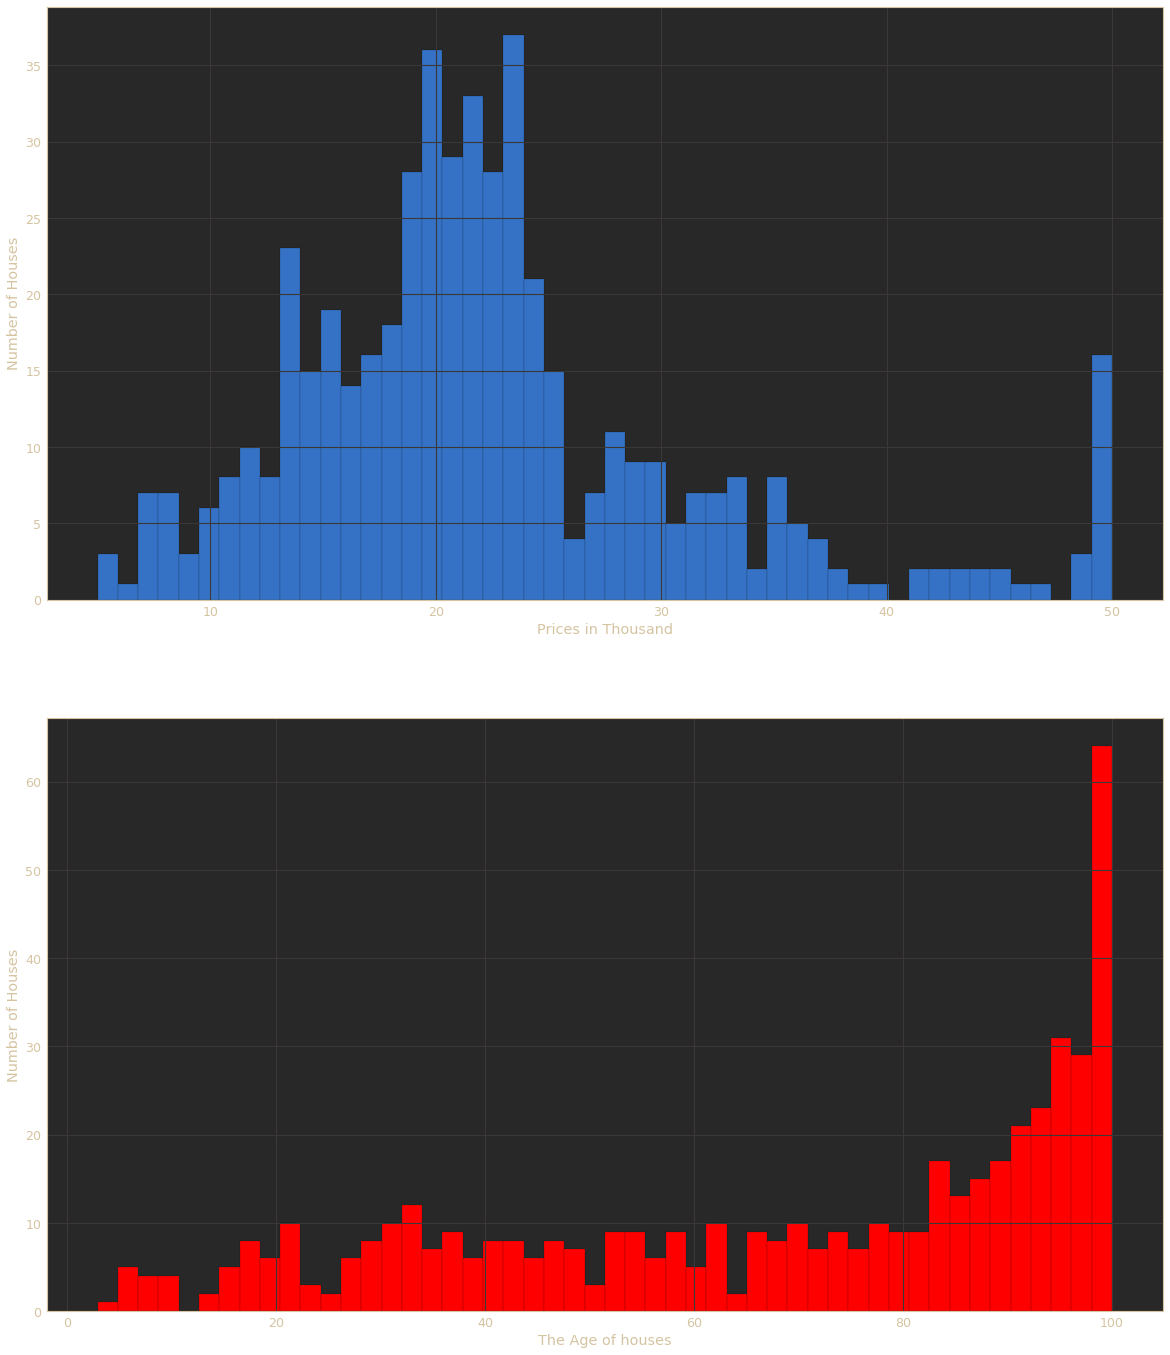

In [10]:
# make histogram of data price
plt.figure(figsize=[20,24])
plt.subplot(2,1,1)
plt.hist(data['PRICE'], bins=50, ec='black',orientation='vertical')
plt.ylabel('Number of Houses')
plt.xlabel('Prices in Thousand')

plt.subplot(2,1,2)
plt.hist(data['AGE'], bins=50, ec='black',orientation='vertical',color ='red')
plt.ylabel('Number of Houses')
plt.xlabel('The Age of houses')

plt.show()

#### 3.1 Descriptive Data 
1. Median is the middle number in sorted ascending or descending 
2. Mean is the average value in sum up of numbers divided by the lenght of number

In [11]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### $$4. Train The Algorithm$$
#### 4.1 Split training data and testing data
Testing data allow us to test our model on data that is independent of our training data. If our model is actually a good model, it should perform just as well on our training data compared to our testing data.

In [12]:
prices= data['PRICE']
features = data.drop('PRICE',axis=1)

# split or shuffle the data with sklearn 
x_train,x_test,y_train,y_test=train_test_split(features , prices , test_size = 0.2 ,
                                                random_state =10)

# the size of test_size is determine the number of testing data we make. 
# for this case I make 0.2  it means 20 % from the total value so remain 80 % for training data

#### 4.2 train the multivariable regression algorithm

In [13]:
# based on the equations
def linear_regression (x,y):    
    slope = ((x-x.mean())* (y-y.mean())).sum() /((x-x.mean())**2).sum()
    intercept = y.mean() - (slope*x.mean())
    predict = (slope*x)+intercept
    return slope , intercept,predict

# we use without sklearn
slope,intercept,predict = linear_regression(x_train['CRIM'],y_train)
print('The slope is: ',slope)
print('The intercept is: ',intercept)

The slope is:  -0.3791036605814181
The intercept is:  23.323859756112203


In [14]:
regr = LinearRegression()
regr.fit(x_train,y_train)

print('Training data r-squared:', regr.score(x_train, y_train))
print('Test data r-squared:', regr.score(x_test, y_test))
print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115631
Intercept 36.533051382824624


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


### $$ 5.Evaluate Data $$

#### 4.1 Correlation

the types of correlation:
1. positive correlation is the increasing of value effected the other value increase also
2. negative correlation is the opposite direction
3. No correlation is no pattern

the things we care about correlation :
1. the strength
2. the direction

## $$ -1.0 \leq \rho_{XY} \leq + 1.0 $$

## $$r=  n\sum\big(xy\big) - \big(\sum{x}\big) \big(\sum{y}\big) \over \sqrt{\big[n\sum{x}^2 - \big(\sum{x}\big)^2\big] \big[n\sum{y}^2 - \big(\sum{y}\big)^2\big]}$$

r = correlation

In [15]:
Image ('/home/fajrin/ML_29/Linear_reg/corr.png' ,width = 1000 , height = 500)

FileNotFoundError: No such file or directory: '/home/fajrin/ML_29/Linear_reg/corr.png'

FileNotFoundError: No such file or directory: '/home/fajrin/ML_29/Linear_reg/corr.png'

<IPython.core.display.Image object>

In [16]:
# the correlation in data series between property prices and the student teacher ratio
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [17]:
datax = data.drop(['PRICE'],axis=1)
col_name = list(datax.columns)
data_cor=[]
for name in col_name :
    data_cor.append(data['PRICE'].corr(datax[name]))
tab_cor =pd.DataFrame({'Price_corr':data_cor},index=col_name)
tab_cor

,Price_corr
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
CHAS,0.175260
NOX,-0.427321
RM,0.695360
AGE,-0.376955
DIS,0.249929
RAD,-0.381626
TAX,-0.468536


In [18]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### Visualize correlation data

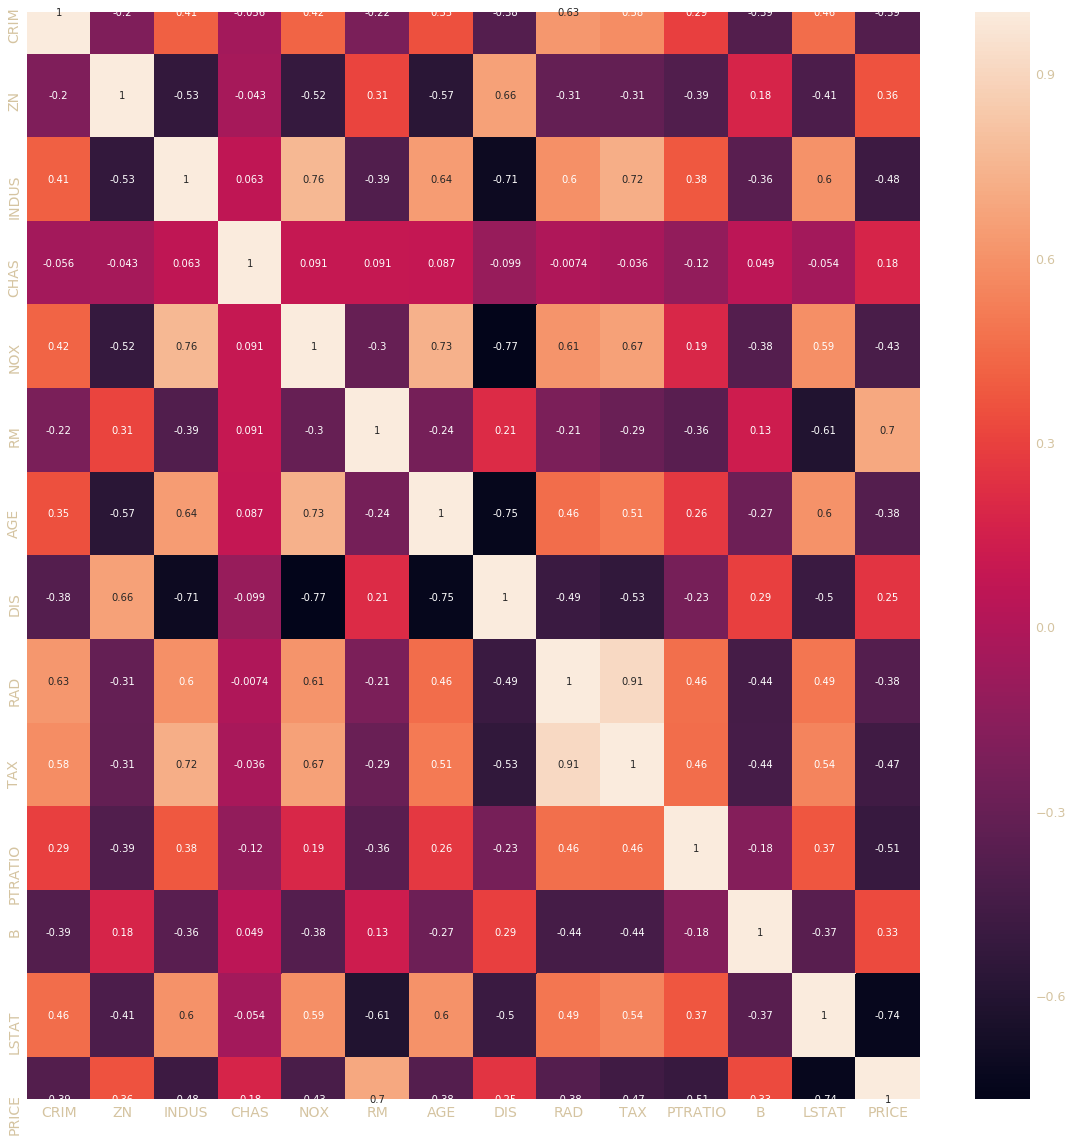

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True)
sns.set_style('white')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text yticklabel objects>)

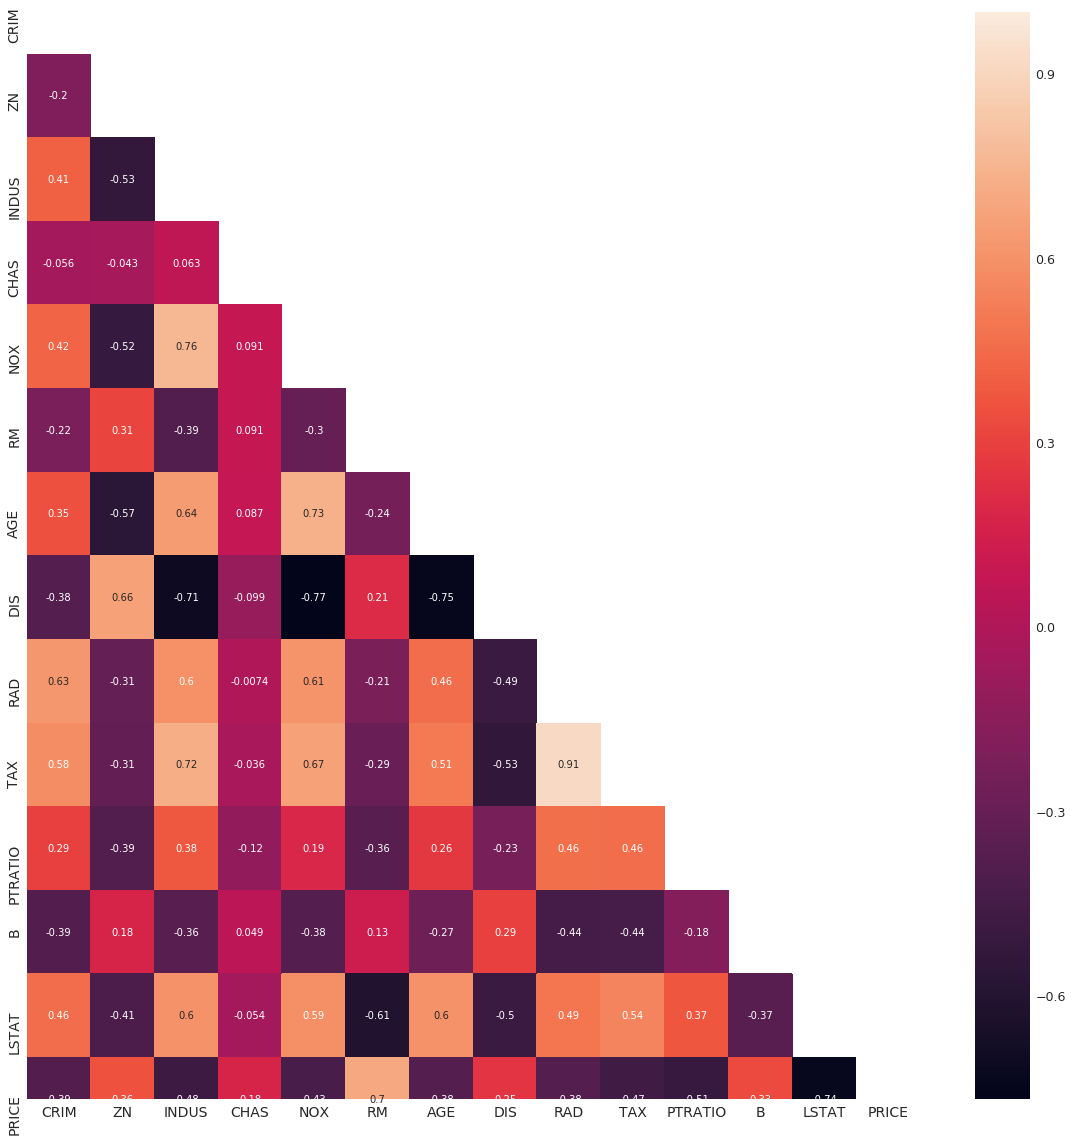

In [20]:
plt.figure(figsize=(20,20))
mask = np.zeros_like(data.corr())
triangel =np.triu_indices_from(mask)
mask[triangel] = True
sns.heatmap(data.corr(), mask = mask, annot = True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

from the picture above we can:
1. identified strong correlations
2. ToDo : simplify by excluding irrelevant data?
3. ToDo : test for multicollinearity


the limit:
1. continous data only
2. correlation does not imply causation
3. Linear relationship only

-0.77


Text(0, 0.5, 'NOX')

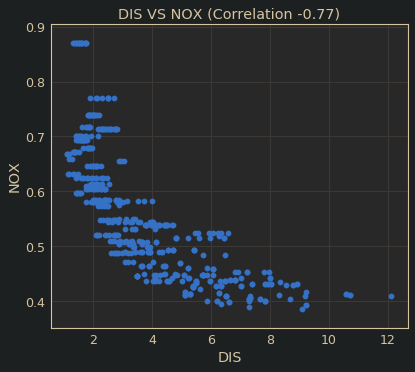

In [21]:
# example of negative correlation
nox_dis_corr = round(data['NOX'].corr(data['DIS']),2)
print(nox_dis_corr)
jtplot.style (theme='gruvboxd')
plt.scatter(data['DIS'],data['NOX'])
plt.title(f'DIS VS NOX (Correlation {nox_dis_corr})')
plt.xlabel('DIS')
plt.ylabel("NOX")

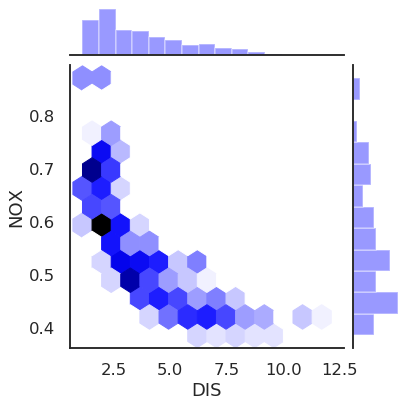

In [22]:
sns.set()
sns.set_context('talk')
sns.set_style('white')
sns.jointplot(x=data['DIS'], y=data['NOX'] ,kind='hex', color='blue')
plt.show()

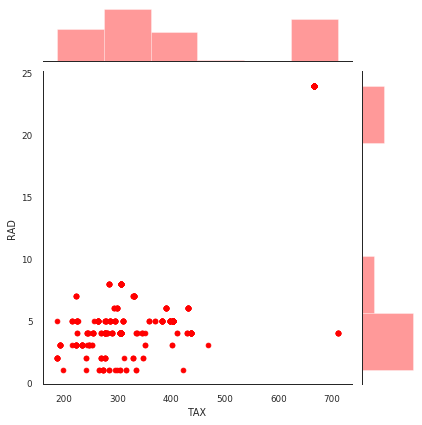

In [23]:
sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.jointplot(x='TAX',y='RAD',data=data , kind='scatter',color ='red')
plt.show()

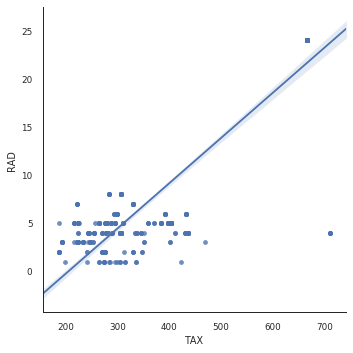

In [24]:
sns.set()
sns.set_context('paper')
sns.set_style('white')
sns.lmplot(x='TAX',y='RAD',data=data) # this is sns plot 

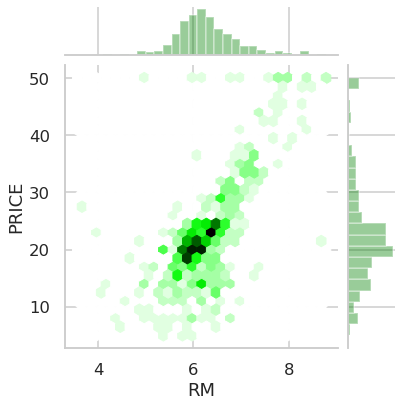

In [25]:
rm_price_corr = round(data['PRICE'].corr(data['RM']),3)

sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x='RM',y='PRICE',data=data , color='green',kind='hex')


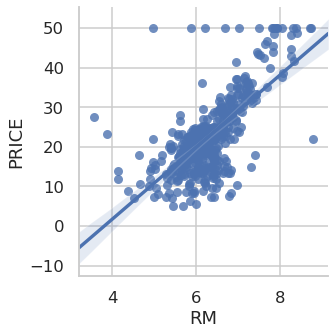

In [26]:
sns.lmplot (x='RM',y='PRICE',data=data)

In [27]:
##%time
##sns.pairplot(data, kind='reg',plot_kws={'line_kws':{'color':'green'}})
##plt.show()

#### 4.2 Data Transformation with Log
##### $$ log\big(\hat{y}\big) = \theta_{0} + \theta_{1}log\big(X_{1}\big)+ \theta_{2}log\big(X_{2}\big) + ... + \theta_{n}log\big(X_{n}\big)$$
#### source link
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/

#### The benefit:
- To get best fit more linear

1.1080984082549072

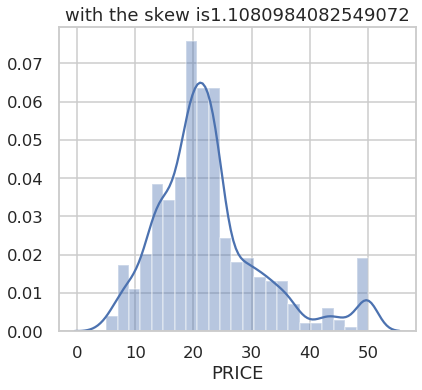

In [28]:
# to look the distribution of the data
data_skew=data['PRICE'].skew()
sns.distplot(data['PRICE'])
plt.title(f'with the skew is{data_skew}')
data_skew

Text(0.5, 1.0, 'with the skew is -0.33032129530987864')

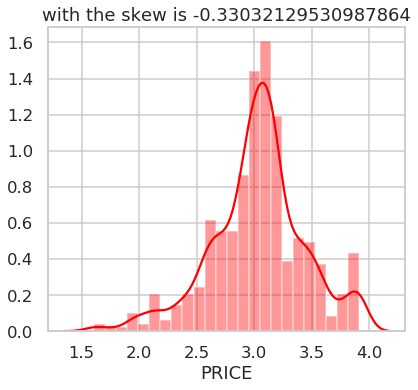

In [29]:
# we use log transformation on prices property
y_log = np.log(data['PRICE'])
sns.distplot (y_log,color='red')
plt.title (f'with the skew is {y_log.skew()}')


Text(0.5, 1, 'LSTAT-Log Prices')

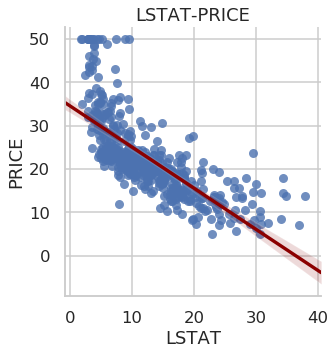

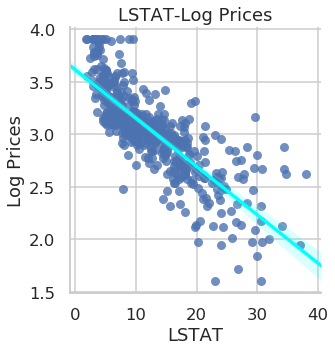

In [30]:
# to compare the data with log and non log
sns.lmplot(x ='LSTAT',y ='PRICE', data= data 
           , line_kws={'color':'darkred'})
plt.title('LSTAT-PRICE')

transformed_data = features
features['Log Prices']=y_log

sns.lmplot(x ='LSTAT',y ='Log Prices', data= transformed_data 
           , line_kws={'color':'cyan'})
plt.title('LSTAT-Log Prices')

In [31]:
prices_log = np.log(data['PRICE']) # Use log prices
features = data.drop('PRICE', axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, prices_log, 
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(x_train, y_train)
data2 = {'intercept' : regr.intercept_, 'slope':regr.coef_}

index = x_train.columns
desc = pd.DataFrame(data2,index =index)
print(desc)
print(40*'=')
#CALCULATE R SQUARE VALUE in data training anda data test
print('The training data r-square is: ',regr.score(x_train,y_train))
print('The test data r-square is: ',regr.score(x_test,y_test))


         intercept     slope
CRIM      4.059944 -0.010672
ZN        4.059944  0.001579
INDUS     4.059944  0.002030
CHAS      4.059944  0.080331
NOX       4.059944 -0.704068
RM        4.059944  0.073404
AGE       4.059944  0.000763
DIS       4.059944 -0.047633
RAD       4.059944  0.014565
TAX       4.059944 -0.000645
PTRATIO   4.059944 -0.034795
B         4.059944  0.000516
LSTAT     4.059944 -0.031390
The training data r-square is:  0.7930234826697583
The test data r-square is:  0.7446922306260717


to convert again the log transformation to the begin value, for example we want to know  how much people pay for the property near the river(CHAS) , so we take the slope of CHAS



In [32]:
np.e**desc.iloc[3,1] # the value slope of chas

1.083645185869641

#### 4.3 p-values (t) and evaulating coefficients 
#### $$ t = {r\sqrt{n-2}\over\sqrt{1-r^2}} $$ 

##### $ r = correlation $

#### Source:
- https://www.machinelearningplus.com/statistics/p-value/

In [33]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
results = model.fit()

col_name = list(x_incl_const.columns)
data_cor=[]
for name in col_name :
    data_cor.append(data['PRICE'].corr(x_incl_const[name]))
tab_cor =pd.DataFrame({'Price_corr':data_cor},index=col_name)
tab_cor
#results.params
#results.pvalues
original_coef_log =pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3),
                                'Price_corr':data_cor})
original_coef_log

/home/fajrin/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-value,Price_corr
const,4.059944,0.000,NaN
CRIM,-0.010672,0.000,-0.392589
ZN,0.001579,0.009,0.406927
INDUS,0.002030,0.445,-0.507743
CHAS,0.080331,0.038,0.154753
NOX,-0.704068,0.000,-0.453959
RM,0.073404,0.000,0.660965
AGE,0.000763,0.209,-0.411030
DIS,-0.047633,0.000,0.287809
RAD,0.014565,0.000,-0.380512


In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 30 Mar 2020   Prob (F-statistic):          1.70e-124
Time:                        12:48:13   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.0

#### 4.4 Testing Multicollinearity and understanding Variance Inflation Factor(VIF)
#### the effects:
- Loss of reliability
- High variability in $\theta$ estimates
- Strange Findings

#### $$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12}LSTAT $$

#### $$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

#### VIF>10

In [35]:
VIF_tax =variance_inflation_factor(exog =x_incl_const.values ,exog_idx=10)
VIF_tax

8.508856493040817

In [36]:
VIF_tax =variance_inflation_factor(exog =x_incl_const.values ,exog_idx=10)
VIF_tax

8.508856493040817

In [37]:
# make a list of V.I.F
VIF=[]
for i in range(x_incl_const.shape[1]):
    VIF.append(variance_inflation_factor(exog =x_incl_const.values , exog_idx=i))
pd.DataFrame({'coef_name':x_incl_const.columns , 'VIF':np.around(VIF,2)})

,coef_name,VIF
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


#### 4.5 Baysian Information Criterion (BIC)
- selecting what data should be remove to get better r squared
- review from correlation and the coefficient significance p-values

In [38]:
# reduce model (1.excluding INDUS dataset)
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#results.params
#results.pvalues
col_name = list(x_incl_const.columns)
data_cor=[]
for name in col_name :
    data_cor.append(data['PRICE'].corr(x_incl_const[name]))
tab_cor =pd.DataFrame({'Price_corr':data_cor},index=col_name)
tab_cor
coef_minus_indus =pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)
                                ,'Price_corr':data_cor})

print('BIC is',results.bic)
print('r-squared is',results.rsquared)


BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [39]:
# reduce model (1.excluding INDUS,AGE dataset)
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#results.params
#results.pvalues
col_name = list(x_incl_const.columns)
data_cor=[]
for name in col_name :
    data_cor.append(data['PRICE'].corr(x_incl_const[name]))
tab_cor =pd.DataFrame({'Price_corr':data_cor},index=col_name)
tab_cor
coef_minus_indus_age =pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3),
                                   'Price_corr':data_cor})

print('BIC is',results.bic)
print('r-squared is',results.rsquared)


BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [40]:
frames = [original_coef_log , coef_minus_indus , coef_minus_indus_age]
pd.concat(frames,axis =1)

/home/fajrin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,p-value,Price_corr,coef,p-value,Price_corr,coef,p-value,Price_corr
AGE,0.000763,0.209,-0.411030,0.000766,0.207,-0.411030,NaN,NaN,NaN
B,0.000516,0.000,0.344289,0.000511,0.000,0.344289,0.000518,0.000,0.344289
CHAS,0.080331,0.038,0.154753,0.082795,0.032,0.154753,0.086449,0.025,0.154753
CRIM,-0.010672,0.000,-0.392589,-0.010721,0.000,-0.392589,-0.010702,0.000,-0.392589
DIS,-0.047633,0.000,0.287809,-0.049394,0.000,0.287809,-0.052692,0.000,0.287809
INDUS,0.002030,0.445,-0.507743,NaN,NaN,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.748821,-0.031262,0.000,-0.748821,-0.030271,0.000,-0.748821
NOX,-0.704068,0.000,-0.453959,-0.673365,0.000,-0.453959,-0.616448,0.000,-0.453959
PTRATIO,-0.034795,0.000,-0.487762,-0.034126,0.000,-0.487762,-0.033481,0.000,-0.487762
RAD,0.014565,0.000,-0.380512,0.014014,0.000,-0.380512,0.013743,0.000,-0.380512


#### 4.6 Residual
- Difference between the target value and predicted value.
- used to check if assumptions and model is valid.
- Residual should be random.
- Residual should be normally distributed( the skew=0 , mean=0 )

In [41]:
# use the modified model to apply in linear regression
prices_log = np.log(data['PRICE']) # using the log prices
features = data.drop(['AGE' ,'INDUS','PRICE'] ,axis =1)

x_train ,x_test , y_train,y_test = train_test_split(features,prices_log ,test_size = 0.2
                                                   ,random_state=10)

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_train)
residual = (y_train-y_pred)
frame = pd.DataFrame({'y_train':y_train, 'y_pred':y_pred, 'residual':residual})
corr= round(frame['y_train'].corr(frame['y_pred']),4)

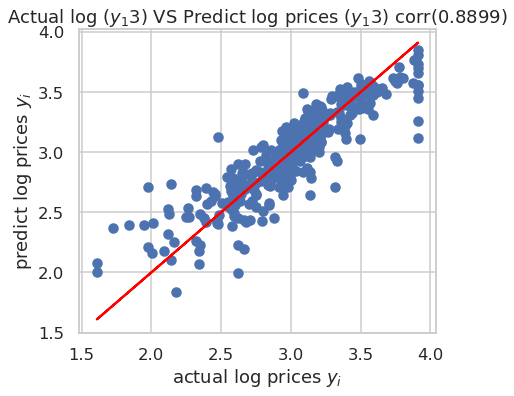

In [42]:
plt.scatter (y_train , y_pred)
plt.plot(y_train , y_train , color = 'red')
plt.xlabel('actual log prices $y_{i}$ ')
plt.ylabel('predict log prices $y_{i}$')
plt.title(f'Actual log $(y_{i})$ VS Predict log prices $(y_{i})$ corr({corr})')
plt.show()


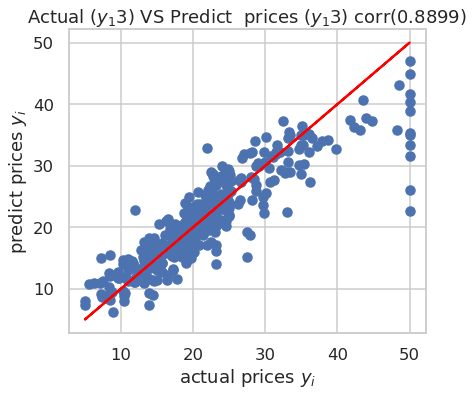

In [43]:
# reverse transformation from log to the actual price 
plt.scatter(np.e**y_train ,np.e**y_pred)
plt.plot(np.e**y_train , np.e**y_train,color='red')
plt.xlabel('actual prices $y_{i}$ ')
plt.ylabel('predict prices $y_{i}$')
plt.title(f'Actual $(y_{i})$ VS Predict  prices $(y_{i})$ corr({corr})')
plt.show()

Text(0.5, 1.0, 'Log Price Model: residual skew(0.118) , residual mean(0.0)')

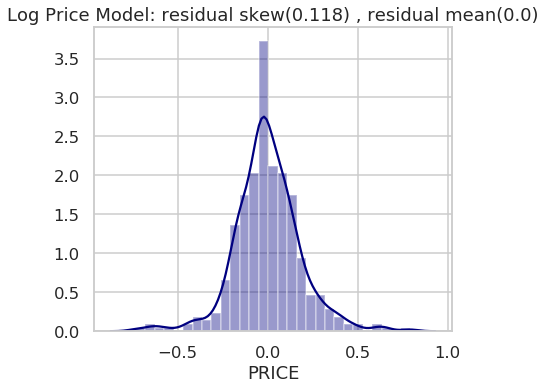

In [44]:
residual_mean = round(residual.mean(),3)
residual_skew = round(residual.skew(),3)

sns.distplot(residual , color ='navy')
plt.title(f'Log Price Model: residual skew({residual_skew}) , residual mean({residual_mean})')

In [45]:
# use the modified model to apply in linear regression
prices_log = np.log(data['PRICE']) # using the log prices
features = data.drop(['AGE' ,'INDUS','PRICE'] ,axis =1)

x_train ,x_test , y_train,y_test = train_test_split(features,prices_log ,test_size = 0.2
                                                   ,random_state=10)

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_train)
residual = (y_train-y_pred)
frame = pd.DataFrame({'y_train':y_train, 'y_pred':y_pred, 'residual':residual})
corr= round(frame['y_train'].corr(frame['y_pred']),4)

type(x_train)

pandas.core.frame.DataFrame

In [46]:
x_t = np.array([1.2,0.5,1.0,0.48,3.86,6.8147,4.0,307,18.9,398,12.2]).reshape(1,11)
yp = lin_reg.predict(x_t)
yp

array([2.82698724])

In [47]:
realprice = np.e**yp
realprice

array([16.894485])